In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import ttest_ind
import numpy as np
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
#pip install folium

In [3]:
louisville_crime_df=pd.read_csv('../data/Louisville_Data/Louisville_Crime_Data_2023.csv')


/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_87593/1800665260.py:1: DtypeWarning: Columns (0,10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  louisville_crime_df=pd.read_csv('../data/Louisville_Data/Louisville_Crime_Data_2023.csv')


In [4]:
louisville_crime_df.head()

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId
0,LMPD23121718,12/11/2023,2023/12/09 05:00:00+00,8585.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,1st Division,123,Residence/Home,800 BLOCK W MUHAMMAD ALI BLVD,LOUISVILLE,40203,1
1,LMPD23121610,12/11/2023,2023/12/01 05:00:00+00,8585.0,23 THEFT OTHER,THEFT OF PROP MISLAID OR DELIVER BY IMISTAKE 5...,23H,A,Yes,7th Division,724,Convenience Store,11800 BLOCK STANDIFORD PLAZA DR,LOUISVILLE,40229,2
2,LMPD23121685,12/11/2023,2023/12/10 05:00:00+00,8142.0,23 THEFT OTHER,"TBUT OR DISP ALL OTHERS $10,000 < $1,000,000 5...",23H,A,Yes,3rd Division,323,Parking/ Drop Lot/ Garage,1200 BLOCK OUTER LOOP,LOUISVILLE,40219,3
3,LMPD23121633,12/11/2023,2023/12/09 05:00:00+00,8142.0,24 VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE 512.040 01403 290,290,A,Yes,7th Division,723,Residence/Home,7500 BLOCK FARMHOUSE LN,LOUISVILLE,40291,4
4,LMPD23121790,12/11/2023,2023/12/10 05:00:00+00,5597.0,19 THEFT FR BLDG,"TBUT OR DISP FROM BUILDING $1,000 < $10,000 51...",23D,A,Yes,5th Division,512,Service/Gas Station,1100 BLOCK BARDSTOWN RD,LOUISVILLE,40204,5


In [5]:
#read csv
louisville_unemployment_df=pd.read_csv('../data/Louisville_Data/Unemployment Rate_Louisville_Jefferson County.csv') 
louisville_unemployment_df.head(3)

,Series ID,Year,Period,Label,Value
0,LAUMT213114000000003,2021,M01,2021 Jan,5.1
1,LAUMT213114000000003,2021,M02,2021 Feb,4.6
2,LAUMT213114000000003,2021,M03,2021 Mar,4.6


In [6]:
louisville_unemployment_df[['Year', 'Month']] = louisville_unemployment_df['Label'].str.split(' ', expand=True)
louisville_unemployment_df.head()

,Series ID,Year,Period,Label,Value,Month
0,LAUMT213114000000003,2021,M01,2021 Jan,5.1,Jan
1,LAUMT213114000000003,2021,M02,2021 Feb,4.6,Feb
2,LAUMT213114000000003,2021,M03,2021 Mar,4.6,Mar
3,LAUMT213114000000003,2021,M04,2021 Apr,4.2,Apr
4,LAUMT213114000000003,2021,M05,2021 May,3.8,May


In [7]:
louisville_unemployment_df.rename(columns={'Value': 'Unemployed Population'}, inplace=True)
louisville_unemployment_df.head(5)

,Series ID,Year,Period,Label,Unemployed Population,Month
0,LAUMT213114000000003,2021,M01,2021 Jan,5.1,Jan
1,LAUMT213114000000003,2021,M02,2021 Feb,4.6,Feb
2,LAUMT213114000000003,2021,M03,2021 Mar,4.6,Mar
3,LAUMT213114000000003,2021,M04,2021 Apr,4.2,Apr
4,LAUMT213114000000003,2021,M05,2021 May,3.8,May


In [8]:
louisville_unemployment_df_by_year = louisville_unemployment_df.groupby('Year')['Unemployed Population'].sum().reset_index()
louisville_unemployment_df_by_year

,Year,Unemployed Population
0,2021,49.9
1,2022,41.9
2,2023,43.3


In [9]:
louisville_crime_df.columns

Index(['Incident_Number', 'Date_Reported', 'Date_Occurred', 'Badge_ID',
       'Offense_Classification', 'Offense_Code_Name', 'NIBRS_Code',
       'NIBRS_Group', 'Was_Offense_Completed', 'LMPD_Division', 'LMPD_Beat',
       'Location_Category', 'Block_Address', 'City', 'Zip_Code', 'ObjectId'],
      dtype='object')

In [10]:
# louisville_crime_df['Offense_Classification']=louisville_crime_df['Offense_Classification'].dropna
# louisville_crime_df['Offense_Classification']
louisville_crime_df.head(4)

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId
0,LMPD23121718,12/11/2023,2023/12/09 05:00:00+00,8585.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,1st Division,123,Residence/Home,800 BLOCK W MUHAMMAD ALI BLVD,LOUISVILLE,40203,1
1,LMPD23121610,12/11/2023,2023/12/01 05:00:00+00,8585.0,23 THEFT OTHER,THEFT OF PROP MISLAID OR DELIVER BY IMISTAKE 5...,23H,A,Yes,7th Division,724,Convenience Store,11800 BLOCK STANDIFORD PLAZA DR,LOUISVILLE,40229,2
2,LMPD23121685,12/11/2023,2023/12/10 05:00:00+00,8142.0,23 THEFT OTHER,"TBUT OR DISP ALL OTHERS $10,000 < $1,000,000 5...",23H,A,Yes,3rd Division,323,Parking/ Drop Lot/ Garage,1200 BLOCK OUTER LOOP,LOUISVILLE,40219,3
3,LMPD23121633,12/11/2023,2023/12/09 05:00:00+00,8142.0,24 VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE 512.040 01403 290,290,A,Yes,7th Division,723,Residence/Home,7500 BLOCK FARMHOUSE LN,LOUISVILLE,40291,4


In [11]:
louisville_crime_df['Offense_Classification'].unique()

array(['23 THEFT OTHER', '24 VANDALISM', '19 THEFT FR BLDG',
       '22 THEFT MV PARTS', '14 AUTO THEFT', '11 SIMPLE ASSAULT',
       '56 ALL OTHER OFFENSES', '46 FAMILY OFFENSES', '27 FRAUD',
       '28 FRAUD CREDIT CARD/ATM', '13 BURGLARY', '21 THEFT FR VEH',
       '55 TRESPASSING', '18 SHOPLIFTING', '34 NARCOTICS', '23 LARCENY',
       '32 EMBEZZLEMENT', '29 FRAUD IMPERSONATION',
       '20 THEFT FR VEND MACHINE', '32 THEFT FR BLDG', '12 INTIMIDATION',
       '26 COUNTERFEITING', '8 ROBBERY', '9 AGGRAVATED ASSAULT',
       '46 WPNS LAW VIOLATION', '25 EXTORTION', '33 STOLEN PROPERTY',
       '35 NARCOTICS EQUIP', '1 HOMICIDE', '15 UNAUTHORIZED USE',
       '10 KIDNAPPING ONLY', nan, '50 DRUNK DRIVING', '99 NON-REPORTABLE',
       '47 FAMILY OFFENSES', '17 PICK POCKET', '54 VOYEURISM',
       '38 PORNOGRAPHY', '51 DISORDERLY CONDUCT', '7 FORCIBLE FONDLING',
       '37 STAT RAPE', '52 DRUNKENNESS', '4 FORCIBLE RAPE',
       '5 SODOMY FORCE', '16 PURSE SNATCH', '43 PROSTITUTION',
    

In [12]:
louisville_crime_df['Offense_Classification']

0           23 THEFT OTHER
1           23 THEFT OTHER
2           23 THEFT OTHER
3             24 VANDALISM
4         19 THEFT FR BLDG
               ...        
65559       23 THEFT OTHER
65560    99 NON-REPORTABLE
65561        14 AUTO THEFT
65562    99 NON-REPORTABLE
65563      21 THEFT FR VEH
Name: Offense_Classification, Length: 65564, dtype: object

In [13]:
#df[['Number', 'Text']] = df['column_name'].str.split(' ', 1, expand=True)
#louisville_crime_df[['Offense','Classification']]=louisville_crime_df['Offense_Classification'].str.split(' ', expand=True)
louisville_crime_df[['Offense', 'Classification']] = louisville_crime_df['Offense_Classification'].str.split(' ', n=1, expand=True)
louisville_crime_df.head(4)

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId,Offense,Classification
0,LMPD23121718,12/11/2023,2023/12/09 05:00:00+00,8585.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,1st Division,123,Residence/Home,800 BLOCK W MUHAMMAD ALI BLVD,LOUISVILLE,40203,1,23,THEFT OTHER
1,LMPD23121610,12/11/2023,2023/12/01 05:00:00+00,8585.0,23 THEFT OTHER,THEFT OF PROP MISLAID OR DELIVER BY IMISTAKE 5...,23H,A,Yes,7th Division,724,Convenience Store,11800 BLOCK STANDIFORD PLAZA DR,LOUISVILLE,40229,2,23,THEFT OTHER
2,LMPD23121685,12/11/2023,2023/12/10 05:00:00+00,8142.0,23 THEFT OTHER,"TBUT OR DISP ALL OTHERS $10,000 < $1,000,000 5...",23H,A,Yes,3rd Division,323,Parking/ Drop Lot/ Garage,1200 BLOCK OUTER LOOP,LOUISVILLE,40219,3,23,THEFT OTHER
3,LMPD23121633,12/11/2023,2023/12/09 05:00:00+00,8142.0,24 VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE 512.040 01403 290,290,A,Yes,7th Division,723,Residence/Home,7500 BLOCK FARMHOUSE LN,LOUISVILLE,40291,4,24,VANDALISM


In [14]:
top_ten_crime=louisville_crime_df['Classification'].value_counts().head(10)
top_ten_crime

Classification
ALL OTHER OFFENSES    7363
AUTO THEFT            6565
SIMPLE ASSAULT        6388
VANDALISM             6148
THEFT OTHER           4361
INTIMIDATION          4132
THEFT FR VEH          3749
BURGLARY              3223
AGGRAVATED ASSAULT    3155
SHOPLIFTING           2470
Name: count, dtype: int64

<Axes: title={'center': 'Top Ten Crime in Louisville'}, ylabel='Classification'>

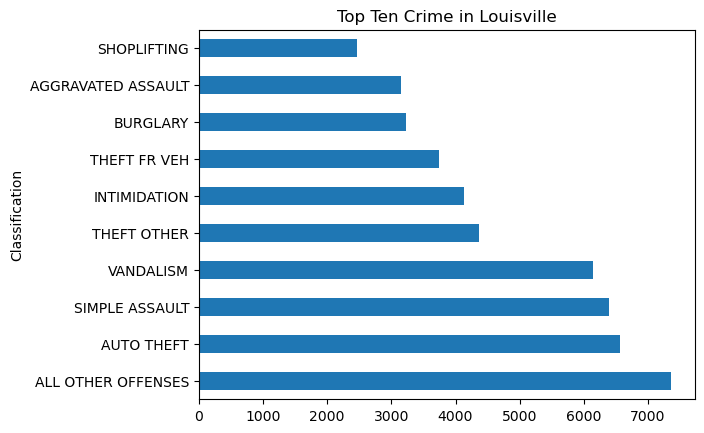

In [15]:
#top ten crime in Louisville
louisville_crime_df['Classification'].value_counts().head(10).plot(kind="barh", title = "Top Ten Crime in Louisville")

In [16]:
louisville_crime_df.head()

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId,Offense,Classification
0,LMPD23121718,12/11/2023,2023/12/09 05:00:00+00,8585.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,1st Division,123,Residence/Home,800 BLOCK W MUHAMMAD ALI BLVD,LOUISVILLE,40203,1,23,THEFT OTHER
1,LMPD23121610,12/11/2023,2023/12/01 05:00:00+00,8585.0,23 THEFT OTHER,THEFT OF PROP MISLAID OR DELIVER BY IMISTAKE 5...,23H,A,Yes,7th Division,724,Convenience Store,11800 BLOCK STANDIFORD PLAZA DR,LOUISVILLE,40229,2,23,THEFT OTHER
2,LMPD23121685,12/11/2023,2023/12/10 05:00:00+00,8142.0,23 THEFT OTHER,"TBUT OR DISP ALL OTHERS $10,000 < $1,000,000 5...",23H,A,Yes,3rd Division,323,Parking/ Drop Lot/ Garage,1200 BLOCK OUTER LOOP,LOUISVILLE,40219,3,23,THEFT OTHER
3,LMPD23121633,12/11/2023,2023/12/09 05:00:00+00,8142.0,24 VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE 512.040 01403 290,290,A,Yes,7th Division,723,Residence/Home,7500 BLOCK FARMHOUSE LN,LOUISVILLE,40291,4,24,VANDALISM
4,LMPD23121790,12/11/2023,2023/12/10 05:00:00+00,5597.0,19 THEFT FR BLDG,"TBUT OR DISP FROM BUILDING $1,000 < $10,000 51...",23D,A,Yes,5th Division,512,Service/Gas Station,1100 BLOCK BARDSTOWN RD,LOUISVILLE,40204,5,19,THEFT FR BLDG


In [17]:
#convert to datetime
louisville_crime_df['Date_Occurred'] = pd.to_datetime(louisville_crime_df['Date_Occurred'])
louisville_crime_df['Date_Occurred']

0       2023-12-09 05:00:00+00:00
1       2023-12-01 05:00:00+00:00
2       2023-12-10 05:00:00+00:00
3       2023-12-09 05:00:00+00:00
4       2023-12-10 05:00:00+00:00
                   ...           
65559   2023-01-02 05:00:00+00:00
65560   2023-01-02 05:00:00+00:00
65561   2023-01-02 05:00:00+00:00
65562   2023-01-02 05:00:00+00:00
65563   2023-01-02 05:00:00+00:00
Name: Date_Occurred, Length: 65564, dtype: datetime64[ns, UTC]

In [18]:
# Extracting the month number and creating 'Month Occured' column
louisville_crime_df['Month Occured'] = louisville_crime_df['Date_Occurred'].dt.month

In [19]:
import calendar

In [20]:
print(louisville_crime_df.columns)

Index(['Incident_Number', 'Date_Reported', 'Date_Occurred', 'Badge_ID',
       'Offense_Classification', 'Offense_Code_Name', 'NIBRS_Code',
       'NIBRS_Group', 'Was_Offense_Completed', 'LMPD_Division', 'LMPD_Beat',
       'Location_Category', 'Block_Address', 'City', 'Zip_Code', 'ObjectId',
       'Offense', 'Classification', 'Month Occured'],
      dtype='object')


In [21]:
#extract month from the 'Date_Occurred' and convert to month name
louisville_crime_df['Month Occured'] = louisville_crime_df['Month Occured'].apply(lambda x: calendar.month_name[x])
louisville_crime_df['Month Occured']

0        December
1        December
2        December
3        December
4        December
           ...   
65559     January
65560     January
65561     January
65562     January
65563     January
Name: Month Occured, Length: 65564, dtype: object

In [22]:
#creat a new column year
louisville_crime_df['Year Occured'] = louisville_crime_df['Date_Occurred'].dt.year
louisville_crime_df.head(1)

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId,Offense,Classification,Month Occured,Year Occured
0,LMPD23121718,12/11/2023,2023-12-09 05:00:00+00:00,8585.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,1st Division,123,Residence/Home,800 BLOCK W MUHAMMAD ALI BLVD,LOUISVILLE,40203,1,23,THEFT OTHER,December,2023


In [23]:
louisville_crime_df['Date_Occurred'] = pd.to_datetime(louisville_crime_df['Date_Occurred'])
louisville_crime_df['Date_Occurred']

0       2023-12-09 05:00:00+00:00
1       2023-12-01 05:00:00+00:00
2       2023-12-10 05:00:00+00:00
3       2023-12-09 05:00:00+00:00
4       2023-12-10 05:00:00+00:00
                   ...           
65559   2023-01-02 05:00:00+00:00
65560   2023-01-02 05:00:00+00:00
65561   2023-01-02 05:00:00+00:00
65562   2023-01-02 05:00:00+00:00
65563   2023-01-02 05:00:00+00:00
Name: Date_Occurred, Length: 65564, dtype: datetime64[ns, UTC]

<Axes: title={'center': 'Total Crime Events by Year'}, xlabel='Month Occured'>

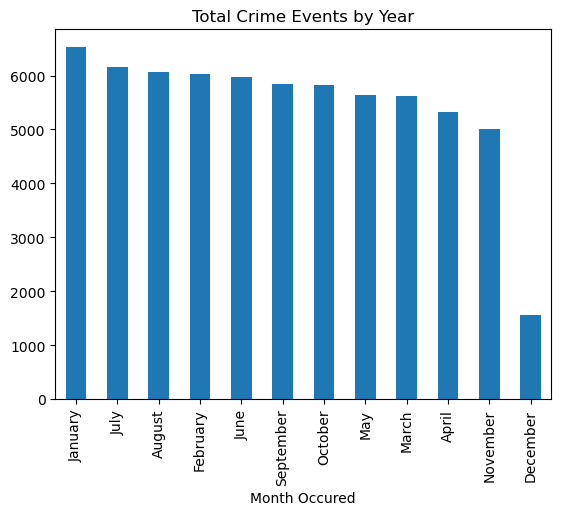

In [24]:
louisville_crime_df['Month Occured'].value_counts().plot(kind="bar", title = "Total Crime Events by Year")

<Axes: title={'center': 'Total Crime Events by Year'}, xlabel='Month Occured'>

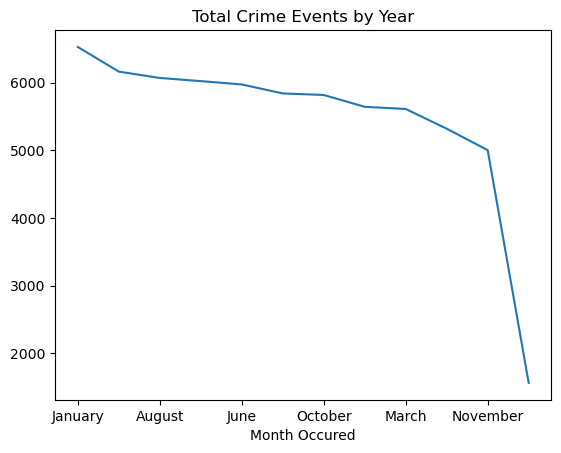

In [25]:
louisville_crime_df['Month Occured'].value_counts().plot(kind="line", title = "Total Crime Events by Year")
#less crime in december and more in January

<Axes: title={'center': 'Total Crime Events by Month'}, xlabel='Month Occured'>

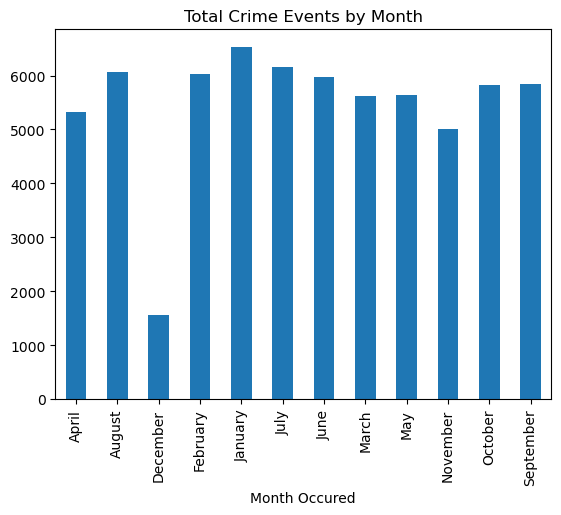

In [26]:
louisville_crime_df.groupby('Month Occured').size().plot(kind = 'bar', title ='Total Crime Events by Month')

In [27]:
louisville_crime_df['Time_Occured'] = louisville_crime_df['Date_Occurred'].dt.time
louisville_crime_df['Time_Occured']

0        05:00:00
1        05:00:00
2        05:00:00
3        05:00:00
4        05:00:00
           ...   
65559    05:00:00
65560    05:00:00
65561    05:00:00
65562    05:00:00
65563    05:00:00
Name: Time_Occured, Length: 65564, dtype: object

In [28]:
louisville_crime_df['Time_Occured'].value_counts()

Time_Occured
04:00:00    44636
05:00:00    20928
Name: count, dtype: int64

<Axes: title={'center': 'Total Crime Events by Day'}, xlabel='hours'>

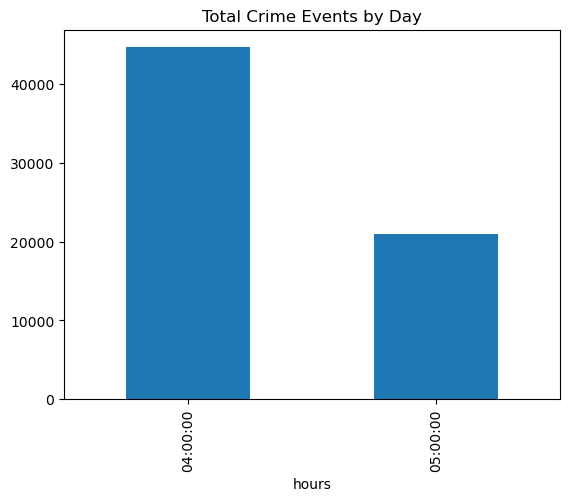

In [29]:
louisville_crime_df.groupby('Time_Occured').size().plot(kind = 'bar', title ='Total Crime Events by Day', xlabel = 'hours')

<Axes: title={'center': 'Total of Crime Events by Zip Code'}, ylabel='Zip_Code'>

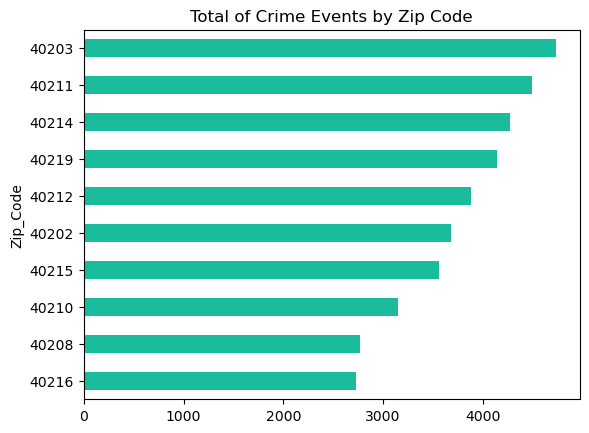

In [30]:
louisville_crime_df['Zip_Code'].value_counts().head(10).sort_values().plot(kind="barh", color = '#1ABC9C', title = 'Total of Crime Events by Zip Code')

In [31]:
louisville_crime_df['Zip_Code'].value_counts().head(10).sort_values()

Zip_Code
40216    2732
40208    2767
40210    3151
40215    3557
40202    3677
40212    3879
40219    4143
40214    4272
40211    4496
40203    4736
Name: count, dtype: int64

In [32]:
top_ten_address=louisville_crime_df['Block_Address'].value_counts().head(10)
top_ten_address

Block_Address
7900 BLOCK SHELBYVILLE RD        330
100 BLOCK OUTER LOOP             290
400 BLOCK E MUHAMMAD ALI BLVD    283
6600 BLOCK DIXIE HWY             224
4800 BLOCK OUTER LOOP            212
4500 BLOCK POPLAR LEVEL RD       210
3300 BLOCK BARDSTOWN RD          206
400 BLOCK S 6TH ST               153
pending                          150
900 BLOCK PHILLIPS LN            140
Name: count, dtype: int64

In [33]:
#10. create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020
# compare_GDP_per_capita_values = [1990, 2000, 2010, 2020]
# gdp_df_compared = gdp_df[gdp_df['Year'].isin(compare_GDP_per_capita_values)]
# gdp_decades = gdp_df[gdp_df['Year'].isin(compare_GDP_per_capita_values)]
louisville_crime_df.head(3)

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,...,Location_Category,Block_Address,City,Zip_Code,ObjectId,Offense,Classification,Month Occured,Year Occured,Time_Occured
0,LMPD23121718,12/11/2023,2023-12-09 05:00:00+00:00,8585.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,1st Division,...,Residence/Home,800 BLOCK W MUHAMMAD ALI BLVD,LOUISVILLE,40203,1,23,THEFT OTHER,December,2023,05:00:00
1,LMPD23121610,12/11/2023,2023-12-01 05:00:00+00:00,8585.0,23 THEFT OTHER,THEFT OF PROP MISLAID OR DELIVER BY IMISTAKE 5...,23H,A,Yes,7th Division,...,Convenience Store,11800 BLOCK STANDIFORD PLAZA DR,LOUISVILLE,40229,2,23,THEFT OTHER,December,2023,05:00:00
2,LMPD23121685,12/11/2023,2023-12-10 05:00:00+00:00,8142.0,23 THEFT OTHER,"TBUT OR DISP ALL OTHERS $10,000 < $1,000,000 5...",23H,A,Yes,3rd Division,...,Parking/ Drop Lot/ Garage,1200 BLOCK OUTER LOOP,LOUISVILLE,40219,3,23,THEFT OTHER,December,2023,05:00:00


In [34]:
louisville_crime_df[louisville_crime_df['Classification']==2023]

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,...,Location_Category,Block_Address,City,Zip_Code,ObjectId,Offense,Classification,Month Occured,Year Occured,Time_Occured


In [35]:
crime_counts_by_zip = louisville_crime_df.groupby(['Zip_Code', 'Classification']).size().reset_index(name='Count')
crime_counts_by_zip

,Zip_Code,Classification,Count
0,40118,AUTO THEFT,1
1,40118,NARCOTICS,1
2,40118,STOLEN PROPERTY,1
3,40202,NON-REPORTABLE,1
4,40203,SODOMY FORCE,1
...,...,...,...
1566,OT,THEFT FR VEH,2
1567,OT,VANDALISM,1
1568,UNKNOWN,AGGRAVATED ASSAULT,1
1569,UNKNOWN,SODOMY FORCE,1


In [36]:
sorted_crimes_by_zip = crime_counts_by_zip.sort_values(['Zip_Code', 'Count'], ascending=[True, False])
sorted_crimes_by_zip

,Zip_Code,Classification,Count
0,40118,AUTO THEFT,1
1,40118,NARCOTICS,1
2,40118,STOLEN PROPERTY,1
3,40202,NON-REPORTABLE,1
4,40203,SODOMY FORCE,1
...,...,...,...
1566,OT,THEFT FR VEH,2
1567,OT,VANDALISM,1
1568,UNKNOWN,AGGRAVATED ASSAULT,1
1569,UNKNOWN,SODOMY FORCE,1


In [37]:
top_crimes_by_zip = sorted_crimes_by_zip.groupby('Zip_Code').head(10)
top_crimes_by_zip

,Zip_Code,Classification,Count
0,40118,AUTO THEFT,1
1,40118,NARCOTICS,1
2,40118,STOLEN PROPERTY,1
3,40202,NON-REPORTABLE,1
4,40203,SODOMY FORCE,1
...,...,...,...
1566,OT,THEFT FR VEH,2
1567,OT,VANDALISM,1
1568,UNKNOWN,AGGRAVATED ASSAULT,1
1569,UNKNOWN,SODOMY FORCE,1


In [49]:
crime_counts_by_month = louisville_crime_df.groupby(['Month Occured', 'Classification']).size().reset_index(name='Count')
crime_counts_by_month

,Month Occured,Classification,Count
0,April,AGGRAVATED ASSAULT,282
1,April,ALL OTHER OFFENSES,610
2,April,ARSON,2
3,April,AUTO THEFT,565
4,April,BURGLARY,273
...,...,...,...
504,September,TRESPASSING,48
505,September,UNAUTHORIZED USE,13
506,September,VANDALISM,551
507,September,VOYEURISM,4


In [51]:
sorted_crimes_by_month = crime_counts_by_month.sort_values(['Month Occured', 'Count'], ascending=[True, False])
sorted_crimes_by_month

,Month Occured,Classification,Count
1,April,ALL OTHER OFFENSES,610
3,April,AUTO THEFT,565
31,April,SIMPLE ASSAULT,547
42,April,VANDALISM,470
39,April,THEFT OTHER,394
...,...,...,...
477,September,EXTORTION,3
497,September,SODOMY FORCE,3
501,September,THEFT FR VEND MACHINE,3
469,September,ARSON,2


In [58]:
top_crimes_by_month = sorted_crimes_by_month.groupby('Month Occured').head(10)
top_crimes_by_month.head(10)

,Month Occured,Classification,Count
1,April,ALL OTHER OFFENSES,610
3,April,AUTO THEFT,565
31,April,SIMPLE ASSAULT,547
42,April,VANDALISM,470
39,April,THEFT OTHER,394
19,April,INTIMIDATION,344
36,April,THEFT FR VEH,319
0,April,AGGRAVATED ASSAULT,282
4,April,BURGLARY,273
30,April,SHOPLIFTING,204


<Axes: title={'center': 'Top Crime in Month'}, xlabel='Month Occured', ylabel='Count'>

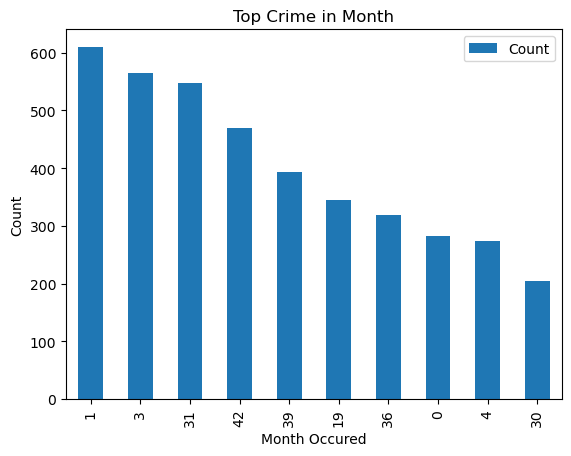

In [60]:
top_crimes_by_month.head(10).plot(kind="bar", xlabel='Month Occured', ylabel='Count', title = "Top Crime in Month")